In [130]:
# NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [131]:
# READ DATA
print("The training file: \n")
train=pd.read_csv("/content/train.csv")
print(train)

The training file: 

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
1594           FDD50          NaN          Low Fat         0.140956   
1595           NCU05       11.800          Low Fat         0.058828   
1596           FDI56        7.325          Low Fat         0.093766   
1597           DRL11       10.500          Low Fat         0.048093   
1598           FDQ08       15.700          Regular         0.018969   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1       

In [132]:
print("The testing file: \n")
test=pd.read_csv("/content/test.csv")
print(test)

The testing file: 

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
1594           NCH55       16.350          Low Fat         0.034666   
1595           DRJ35       10.100          Low Fat         0.000000   
1596           FDS44       12.650          Regular         0.156014   
1597           DRE01       10.100               LF         0.167836   
1598           FDY39        5.305          Regular         0.046990   

                  Item_Type  Item_MRP Outlet_Identifier  \
0               Snack Foods  107.8622            OUT049   
1        

In [133]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2016,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2015,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,2014,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,2016,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,2022,High,Tier 3,Supermarket Type1,994.7052


In [134]:
# DATA INFO
print("summary of non null data: \n")
train.info()

summary of non null data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            1599 non-null   object 
 1   Item_Weight                1308 non-null   float64
 2   Item_Fat_Content           1599 non-null   object 
 3   Item_Visibility            1599 non-null   float64
 4   Item_Type                  1599 non-null   object 
 5   Item_MRP                   1599 non-null   float64
 6   Outlet_Identifier          1599 non-null   object 
 7   Outlet_Establishment_Year  1599 non-null   int64  
 8   Outlet_Size                1141 non-null   object 
 9   Outlet_Location_Type       1599 non-null   object 
 10  Outlet_Type                1599 non-null   object 
 11  Item_Outlet_Sales          1599 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 150.0+ KB


In [135]:
# NULL DATA
print("summary of null data: \n")
data=pd.DataFrame(train.isnull().sum(),columns=['NUMBER OF NULL'])/len(train)*100
print(data)

summary of null data: 

                           NUMBER OF NULL
Item_Identifier                  0.000000
Item_Weight                     18.198874
Item_Fat_Content                 0.000000
Item_Visibility                  0.000000
Item_Type                        0.000000
Item_MRP                         0.000000
Outlet_Identifier                0.000000
Outlet_Establishment_Year        0.000000
Outlet_Size                     28.642902
Outlet_Location_Type             0.000000
Outlet_Type                      0.000000
Item_Outlet_Sales                0.000000


In [136]:
# CONTAIN DUPLICATE DATA
train[train.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [137]:
# OBJECT COLUMN
print("Columns names of all object type: \n")
object=train.select_dtypes(include="object").columns
print(object)

Columns names of all object type: 

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


set of countplots for the specified columns: 



<ipython-input-138-c76b5fec83e5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=train,palette='Set3')
<ipython-input-138-c76b5fec83e5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=train,palette='Set3')
<ipython-input-138-c76b5fec83e5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=train,palette='Set3')


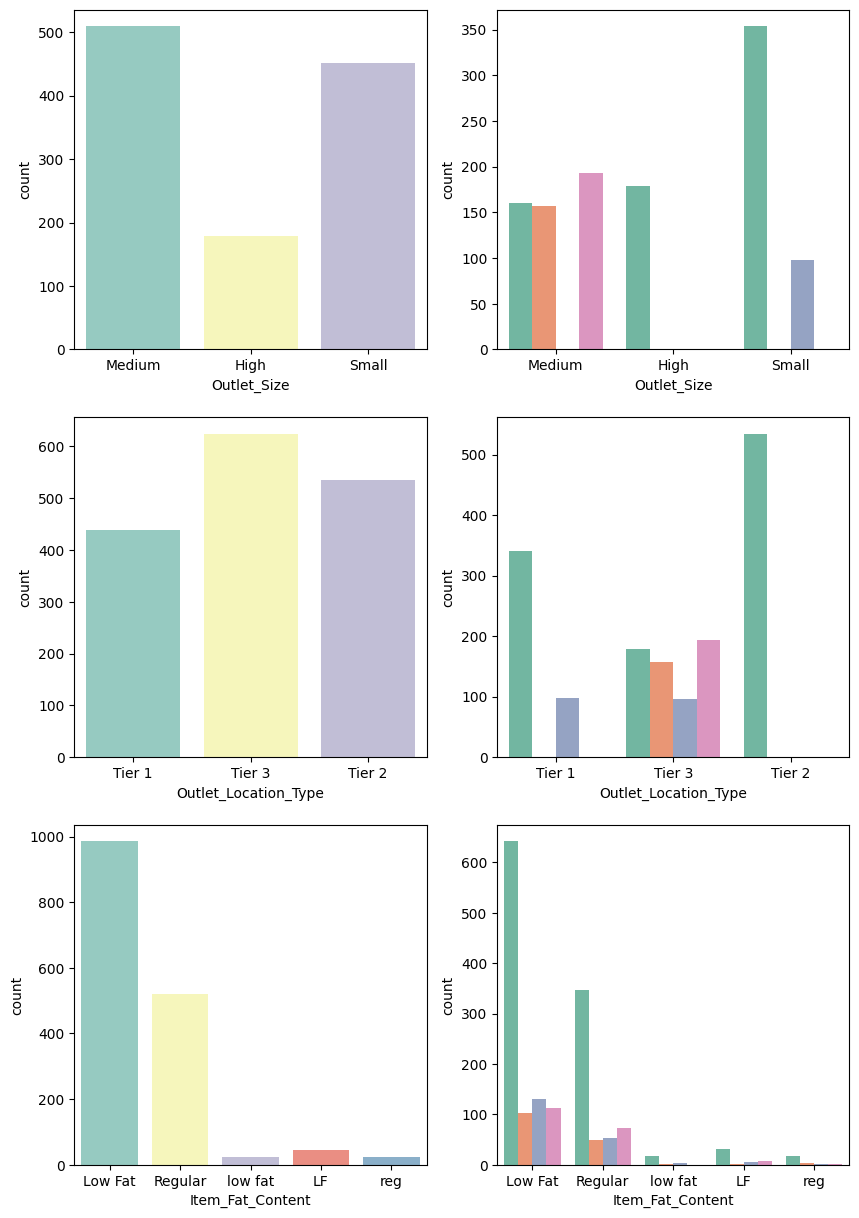

In [138]:
# DATA VISUALIZATION
plt.figure(figsize=(10,15))
print("set of countplots for the specified columns: \n")
i=1
for col in ['Outlet_Size' , 'Outlet_Location_Type' , 'Item_Fat_Content']:
  plt.subplot(3,2,i)
  sns.countplot(x=col,data=train,palette='Set3')
  i+=1
  plt.subplot(3,2,i)
  sns.countplot(x=col,hue='Outlet_Type',data=train,palette='Set2',legend=False)
  i+=1

<ipython-input-139-3438cf3e375d>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=col,data=train,palette='Set3')
<ipython-input-139-3438cf3e375d>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=col,data=train,palette='Set3')
<ipython-input-139-3438cf3e375d>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=col,data=train,palette='Set3')


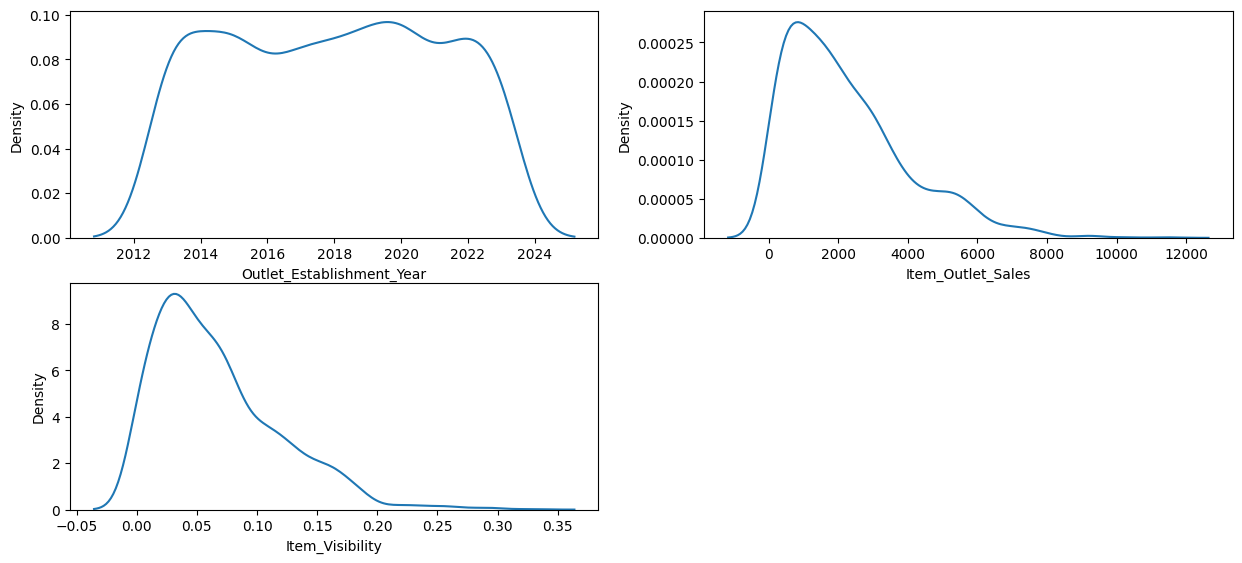

In [139]:
plt.figure(figsize=(15,10))
i=1
for col in ['Outlet_Establishment_Year' , 'Item_Outlet_Sales' , 'Item_Visibility']:
  plt.subplot(3,2,i)
  sns.kdeplot(x=col,data=train,palette='Set3')
  i +=1

<ipython-input-140-9cadea6ce95b>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x='Item_MRP',data=train,palette='Set3')


<Axes: xlabel='Item_MRP', ylabel='Density'>

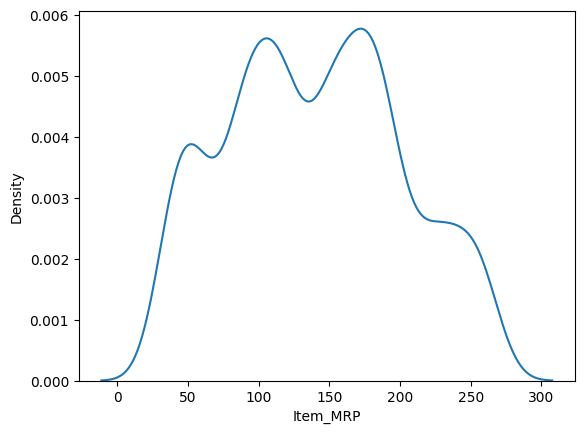

In [140]:
sns.kdeplot(x='Item_MRP',data=train,palette='Set3')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

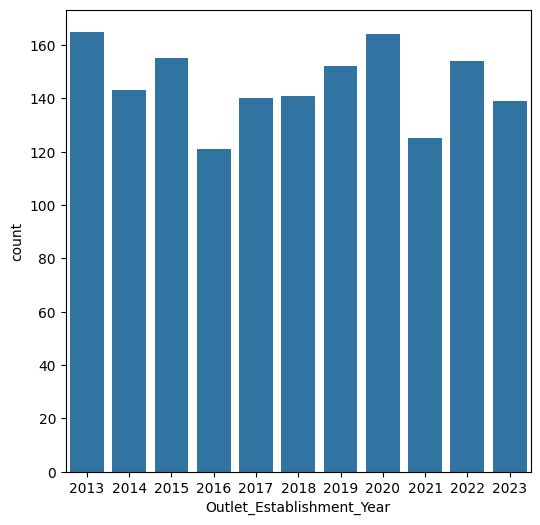

In [141]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=train)

The 30unit wide & 6unit tall data: 



<Axes: xlabel='Item_Type', ylabel='count'>

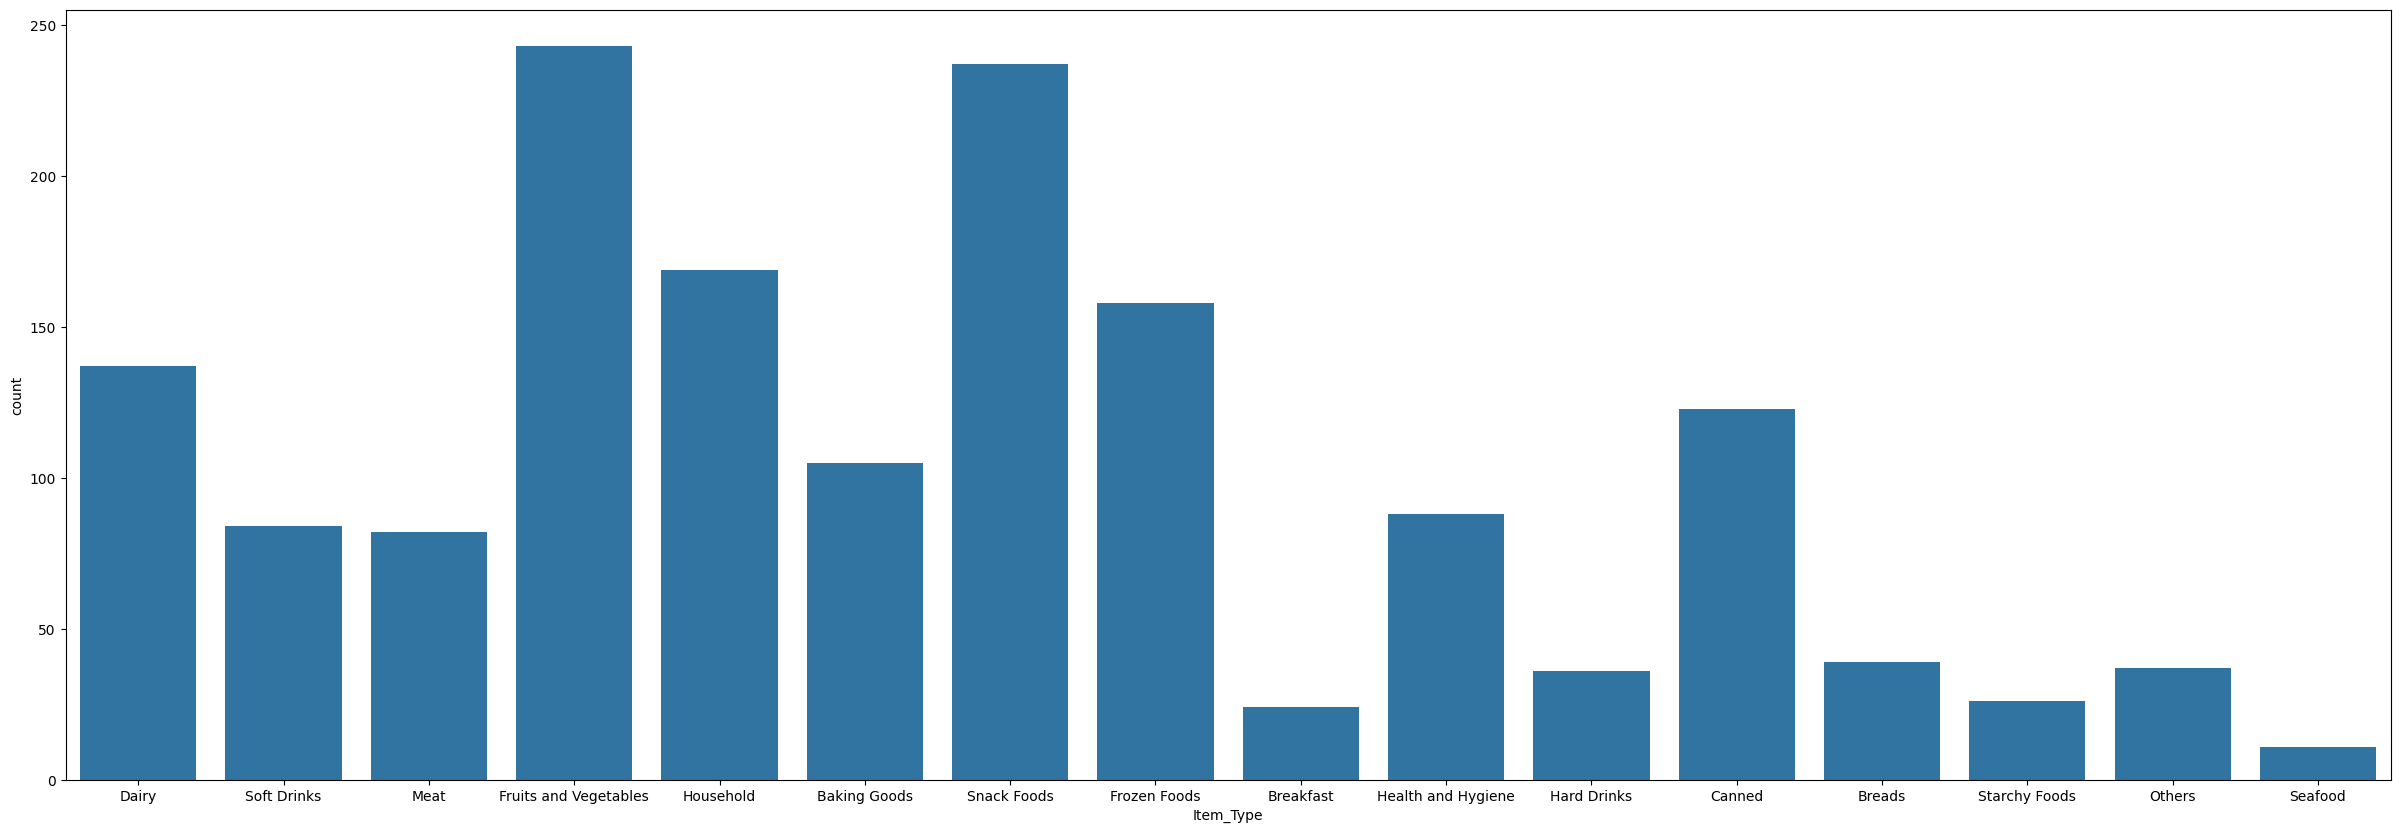

In [142]:
print("The 30unit wide & 6unit tall data: \n")
plt.figure(figsize=(30,10))
sns.countplot(x='Item_Type',data=train)

In [143]:
# SHOW INPUT X & OUTPUT Y
X=train.iloc[:,:-1]
y=train.iloc[:,-1]
key=X.keys()
print(X)
print(y)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
1594           FDD50          NaN          Low Fat         0.140956   
1595           NCU05       11.800          Low Fat         0.058828   
1596           FDI56        7.325          Low Fat         0.093766   
1597           DRL11       10.500          Low Fat         0.048093   
1598           FDQ08       15.700          Regular         0.018969   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [144]:
le = LabelEncoder()
for col in object:
    X[col]=le.fit_transform(X[col])
    test[col]=le.fit_transform(test[col])
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 110        9.300                 1         0.016047   
1                   5        5.920                 2         0.019278   
2                 446       17.500                 1         0.016760   
3                 739       19.200                 2         0.000000   
4                 867        8.930                 1         0.000000   
...               ...          ...               ...              ...   
1594              215          NaN                 1         0.140956   
1595              996       11.800                 1         0.058828   
1596              339        7.325                 1         0.093766   
1597               80       10.500                 1         0.048093   
1598              526       15.700                 2         0.018969   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [145]:
# FILL EMPTY(NAN) DATA
print("Filling the empty NAN data: \n")
imp=SimpleImputer(missing_values=np.nan, strategy="mean")
X=imp.fit_transform(X)
test=imp.fit_transform(test)
X=pd.DataFrame(X,columns=key)
print(X)

Filling the empty NAN data: 

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0               110.0     9.300000               1.0         0.016047   
1                 5.0     5.920000               2.0         0.019278   
2               446.0    17.500000               1.0         0.016760   
3               739.0    19.200000               2.0         0.000000   
4               867.0     8.930000               1.0         0.000000   
...               ...          ...               ...              ...   
1594            215.0    13.046659               1.0         0.140956   
1595            996.0    11.800000               1.0         0.058828   
1596            339.0     7.325000               1.0         0.093766   
1597             80.0    10.500000               1.0         0.048093   
1598            526.0    15.700000               2.0         0.018969   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0           4.0  2

In [146]:
# MINMAXSCALER OF DATA
print("Transforming the data to minmax scaler: \n")
scaler=MinMaxScaler(copy=True, feature_range=(0,1))
X=scaler.fit_transform(X)
test=scaler.fit_transform(test)
X=pd.DataFrame(X,columns=key)
print(X)

Transforming the data to minmax scaler: 

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0            0.106796     0.281026              0.25         0.048866   
1            0.004854     0.079356              0.50         0.058705   
2            0.433010     0.770286              0.25         0.051037   
3            0.717476     0.871718              0.50         0.000000   
4            0.841748     0.258950              0.25         0.000000   
...               ...          ...               ...              ...   
1594         0.208738     0.504574              0.25         0.429233   
1595         0.966990     0.430191              0.25         0.179139   
1596         0.329126     0.163186              0.25         0.285531   
1597         0.077670     0.352625              0.25         0.146450   
1598         0.510680     0.662888              0.50         0.057763   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0     

In [147]:
# SPLITTING DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44, shuffle=True)
print('X_train shape is: ',X_train.shape)
print('X_test shape is: ',X_test.shape)
print('y_train shape is: ',y_train.shape)
print('y_test shape is: ',y_test.shape)

X_train shape is:  (1439, 11)
X_test shape is:  (160, 11)
y_train shape is:  (1439,)
y_test shape is:  (160,)


In [148]:
# APPLYING RANDOM FOREST REGRESSOR MODEL
print("predict the new data: \n")
RandomForestRegressorModel=RandomForestRegressor (n_estimators=100, max_depth=7, random_state=90)
RandomForestRegressorModel.fit(X_train, y_train)

predict the new data: 



RandomForestRegressor(max_depth=7, random_state=90)

In [149]:
print('random forest regressor train score is : ',RandomForestRegressorModel.score(X_train,y_train))
print('random forest regressor test score is : ',RandomForestRegressorModel.score(X_test,y_test))
print('random forest regressor no of features are : ',RandomForestRegressorModel.n_features_in_)

random forest regressor train score is :  0.7320321664019569
random forest regressor test score is :  0.570934885825029
random forest regressor no of features are :  11


In [150]:
y_pred=RandomForestRegressorModel.predict(X_test)
print('predicted value for random forest regressor is : ',y_pred[:10])

predicted value for random forest regressor is :  [3933.63560202 1757.32537304 1475.12762295  622.53388465 3071.51467602
 2971.68060492  875.57638581 3809.15778896  780.29036853 1021.56494697]


In [151]:
# CALCULATE MEAN ABSOLUTE ERRORS
mae_value=mean_absolute_error(y_test, y_pred, multioutput="uniform_average")
print("mean absolute error value is : ",mae_value)
mse_value=mean_squared_error(y_test, y_pred, multioutput="uniform_average")
print("mean squard error value is : ",mse_value)
mdse_value=median_absolute_error(y_test, y_pred)
print("median absolute error value is : ",mdse_value)

mean absolute error value is :  823.5811516632126
mean squard error value is :  1291416.9989934447
median absolute error value is :  628.152654715551


In [152]:
y_test=RandomForestRegressorModel.predict(test)
print(y_test)

[1792.57783959 1322.04252772  480.64402879 ... 3836.05336765 4346.96431987
 3169.74498398]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [153]:
# OUTPUT HERE
y_test=pd.DataFrame(y_test, columns=['Item_Outlet_Sales'])
y_test.to_csv("/content/prediction.csv")
print(y_test)

      Item_Outlet_Sales
0           1792.577840
1           1322.042528
2            480.644029
3           2568.320063
4           6055.379988
...                 ...
1594        2158.189999
1595        1010.177211
1596        3836.053368
1597        4346.964320
1598        3169.744984

[1599 rows x 1 columns]
